In [42]:
import rasterio
import numpy as np
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from bokeh.models import ColorBar, LinearColorMapper
from bokeh.io import output_notebook
from bokeh.transform import linear_cmap
from bokeh.models import LogColorMapper
from rasterio.plot import show
import matplotlib.pyplot as plt

In [30]:
band1_path = 'C:\\Users\\Vighnesh\\Desktop\\Geospatial Data Analysis\\Images\\LakshadweepB1.TIF'
band2_path = 'C:\\Users\\Vighnesh\Desktop\\Geospatial Data Analysis\\Images\\LakshadweepB2.TIF'   # Blue
band3_path = 'C:\\Users\\Vighnesh\\Desktop\\Geospatial Data Analysis\\Images\\LakshadweepB3.TIF'
band4_path = 'C:\\Users\\Vighnesh\\Desktop\\Geospatial Data Analysis\\Images\\LakshadweepB4.TIF'  # Red
band5_path = 'C:\\Users\\Vighnesh\\Desktop\\Geospatial Data Analysis\\Images\\LakshadweepB5.TIF'  # NIR
band6_path = 'C:\\Users\\Vighnesh\\Desktop\\Geospatial Data Analysis\\Images\\LakshadweepB6.TIF'  # SWIR 1
band7_path = 'C:\\Users\\Vighnesh\\Desktop\\Geospatial Data Analysis\\Images\\LakshadweepB7.TIF'  # SWIR 2
band8_path = 'C:\\Users\\Vighnesh\\Desktop\\Geospatial Data Analysis\\Images\\LakshadweepB8.TIF'
band9_path = 'C:\\Users\\Vighnesh\\Desktop\\Geospatial Data Analysis\\Images\\LakshadweepB9.TIF'

In [43]:
band2 = rasterio.open('C:\\Users\\Vighnesh\Desktop\\Geospatial Data Analysis\\Images\\LakshadweepB2.TIF')
band4 = rasterio.open('C:\\Users\\Vighnesh\\Desktop\\Geospatial Data Analysis\\Images\\LakshadweepB4.TIF')
band5 = rasterio.open('C:\\Users\\Vighnesh\\Desktop\\Geospatial Data Analysis\\Images\\LakshadweepB5.TIF')
band6 = rasterio.open('C:\\Users\\Vighnesh\\Desktop\\Geospatial Data Analysis\\Images\\LakshadweepB6.TIF')

In [44]:
b2 = band2.read()
b4 = band4.read()
b5 = band5.read()
b6 = band6.read()

#Create 2D Numpy array.

In [45]:
b2_b1 = band2.read(1)
b4_b1 = band4.read(1)
b5_b1 = band5.read(1)
b6_b1 = band6.read(1)

#Read the first band of the image. Use these variables for matplotlib visualization

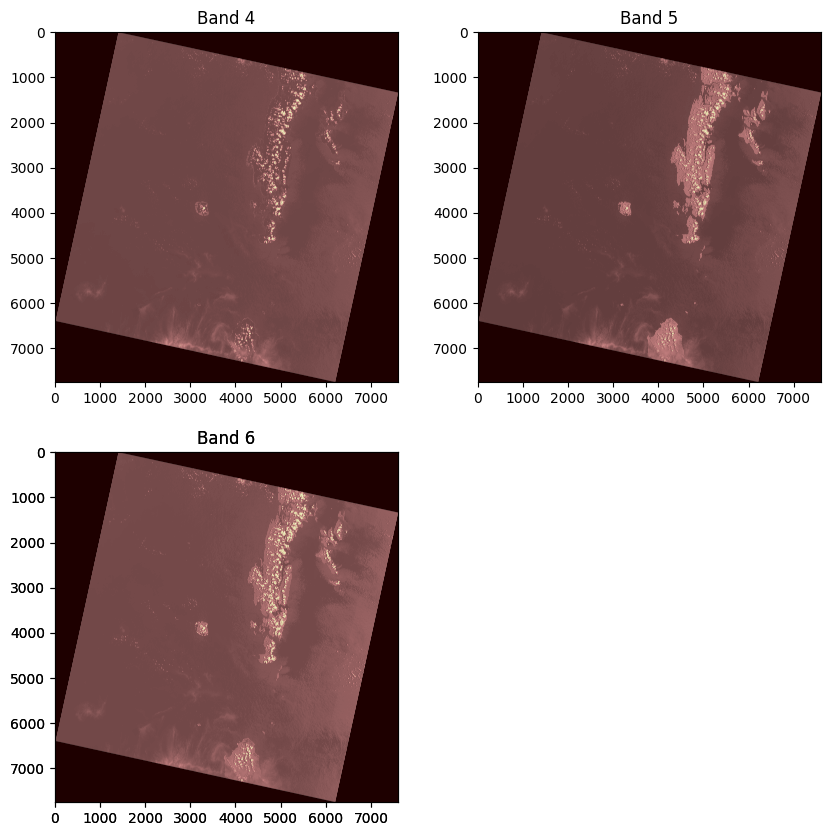

In [28]:
fig = plt.figure(figsize = (10, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(b4_b1, cmap = 'pink')
ax1.set_title("Band 4")

ax2 = fig.add_subplot(2, 2, 2)
ax2.imshow(b5_b1, cmap = 'pink')
ax2.set_title("Band 5")

ax3 = fig.add_subplot(2, 2, 3)
ax3.imshow(b6_b1, cmap = 'pink')
ax3.set_title("Band 6")

ax4 = fig.add_subplot(2, 2, 3)
ax4.imshow(b6_b1, cmap = 'pink')
ax4.set_title("Band 6")

plt.show()

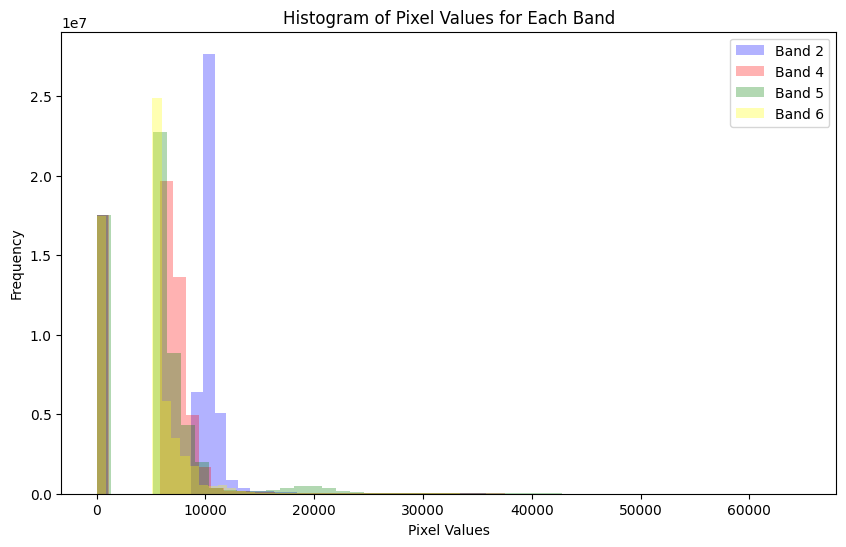

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(b2_b1.flatten(), bins=50, alpha=0.3, color='blue', label='Band 2')
plt.hist(b4_b1.flatten(), bins=50, alpha=0.3, color='red', label='Band 4')
plt.hist(b5_b1.flatten(), bins=50, alpha=0.3, color='green', label='Band 5')
plt.hist(b6_b1.flatten(), bins=50, alpha=0.3, color='yellow', label='Band 6')

# Add title, labels, and legend
plt.title('Histogram of Pixel Values for Each Band')
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')
plt.legend()

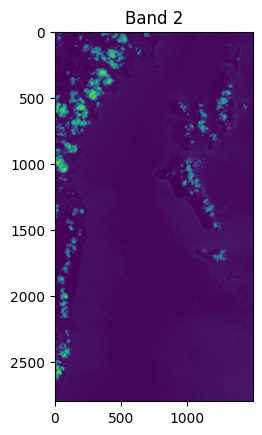

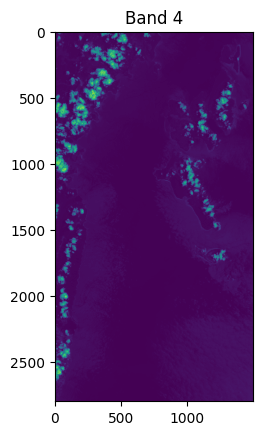

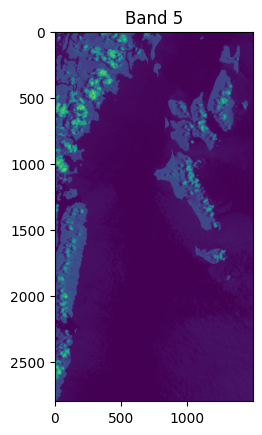

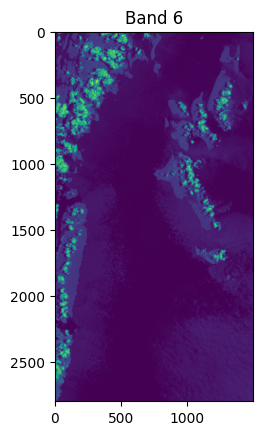

<Axes: title={'center': 'Band 6'}>

In [46]:
clipped_b2 = b2_b1[1200:4000, 5000:6500]
clipped_b4 = b4_b1[1200:4000, 5000:6500]
clipped_b5 = b5_b1[1200:4000, 5000:6500]
clipped_b6 = b6_b1[1200:4000, 5000:6500]

plt.title('Band 2')
show(clipped_b2)

plt.title('Band 4')
show(clipped_b4)

plt.title('Band 5')
show(clipped_b5)

plt.title('Band 6')
show(clipped_b6)

In [73]:
def calculate_ndvi(nir_band, red_band):
    ndvi = np.divide(np.subtract(nir_band, red_band), np.add(nir_band, red_band))
    NDVI = np.nan_to_num(ndvi, nan=-1) 
    NDVI = np.round(NDVI, 2)

    print("NDVI array: \n",NDVI)
    
    return NDVI

def ndvi_plot(x):
    plt.imshow(x, cmap = 'Greens')
    plt.title('NDVI Plot')
    plt.colorbar()

In [48]:
blue = clipped_b2.astype('f4')
red = clipped_b4.astype('f4')
nir = clipped_b5.astype('f4')
swir = clipped_b6.astype('f4')

NDVI array: 
 [[ 0.44  0.45  0.42 ... -0.02 -0.02 -0.02]
 [ 0.43  0.43  0.4  ... -0.02 -0.02 -0.02]
 [ 0.42  0.44  0.44 ... -0.02 -0.02 -0.02]
 ...
 [ 0.34  0.29  0.34 ... -0.01 -0.01 -0.01]
 [ 0.39  0.41  0.4  ... -0.01 -0.   -0.01]
 [ 0.44  0.42  0.4  ... -0.01 -0.01 -0.01]]


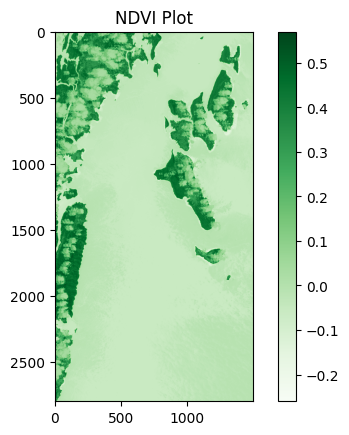

In [74]:
NDVI = calculate_ndvi(nir, red)
ndvi_plot(NDVI)

In [118]:
def calculate_ndmi(nir_band, swir_band):
    ndmi = np.divide(np.subtract(nir_band, swir_band), np.add(nir_band, swir_band))
    NDMI = np.nan_to_num(ndmi, nan = -1)
    NDMI = np.round(NDMI, 2)

    print('NDMI Array: \n', NDMI)

    return NDMI

def ndmi_plot(x):
    plt.imshow(NDMI, cmap = 'Blues')
    plt.title("NDMI Plot")
    plt.colorbar()

NDMI Array: 
 [[0.29 0.28 0.24 ... 0.03 0.04 0.04]
 [0.29 0.25 0.19 ... 0.03 0.04 0.03]
 [0.27 0.27 0.25 ... 0.03 0.04 0.04]
 ...
 [0.08 0.02 0.07 ... 0.04 0.04 0.04]
 [0.14 0.18 0.17 ... 0.04 0.05 0.04]
 [0.21 0.2  0.14 ... 0.04 0.04 0.04]]


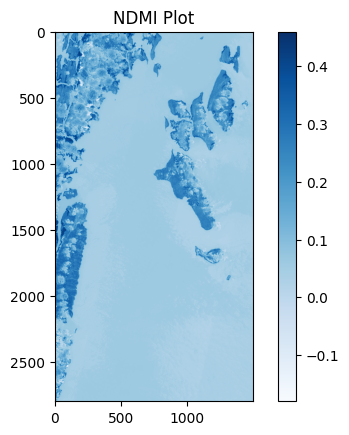

In [119]:
NDMI = calculate_ndmi(nir, swir)
ndmi_plot(NDMI)

In [123]:
def calculate_savi(nir_band, red_band):
    L = 0.5
    numerator = np.multiply(np.subtract(nir_band, red_band), np.add(1, L))
    denominator = nir_band + red_band + L
    
    savi = np.divide(numerator, denominator)
    SAVI = np.nan_to_num(savi, nan = -1)
    SAVI = np.round(SAVI, 2)

    print("SAVI Array: \n", SAVI)
    
    return SAVI

def plot_savi(x):
    plt.imshow(SAVI, cmap = 'Blues')
    plt.title("SAVI Plot")
    plt.colorbar()

SAVI Array: 
 [[ 0.66  0.68  0.63 ... -0.03 -0.02 -0.03]
 [ 0.65  0.64  0.6  ... -0.03 -0.03 -0.03]
 [ 0.63  0.65  0.65 ... -0.04 -0.03 -0.03]
 ...
 [ 0.51  0.44  0.5  ... -0.01 -0.01 -0.01]
 [ 0.59  0.62  0.6  ... -0.01 -0.01 -0.01]
 [ 0.66  0.63  0.6  ... -0.01 -0.01 -0.01]]


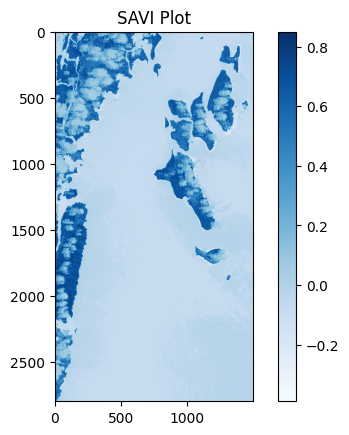

In [125]:
SAVI = calculate_savi(nir, red)
plot_savi(SAVI)

In [127]:
def calculate_ndbi(swir_band, nir_band):
    
    numerator = np.subtract(swir_band, nir_band)
    denominator = np.add(swir_band, nir_band)
    
    ndbi = np.divide(numerator, denominator)
    NDBI = np.nan_to_num(ndbi, nan = -1)
    NDBI = np.round(NDBI, 2)

    print("NDBI Array: \n", NDBI)

    return NDBI

def plot_ndbi(x):
    plt.imshow(NDBI, cmap = 'Wistia')
    plt.title("NDBI Plot")
    plt.colorbar()

NDBI Array: 
 [[-0.29 -0.28 -0.24 ... -0.03 -0.04 -0.04]
 [-0.29 -0.25 -0.19 ... -0.03 -0.04 -0.03]
 [-0.27 -0.27 -0.25 ... -0.03 -0.04 -0.04]
 ...
 [-0.08 -0.02 -0.07 ... -0.04 -0.04 -0.04]
 [-0.14 -0.18 -0.17 ... -0.04 -0.05 -0.04]
 [-0.21 -0.2  -0.14 ... -0.04 -0.04 -0.04]]


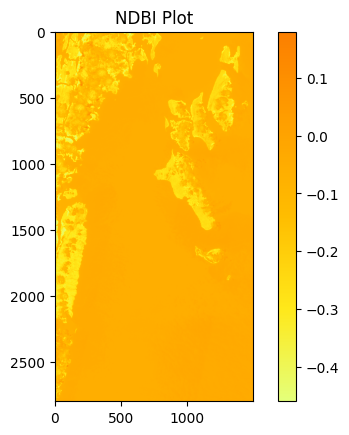

In [128]:
NDBI = calculate_ndbi(swir, nir)
plot_ndbi(NDBI)

In [109]:
def analyze_ndvi(ndvi):
    classes = {
        "Water / Non-Vegetated Area": (-1.0, 0.0),
        "Bare Soil": (0.0, 0.2),
        "Sparse Vegetation": (0.2, 0.5),
        "Moderate Vegetation": (0.5, 0.7),
        "Dense Vegetation": (0.7, 1.0)
    }

    total_pixels = ndvi.size

    #Pixels in each Class
    analysis_report = {}
    land_pixels = 0  
    
    for category, (min, max) in classes.items():
        count = np.sum((ndvi >= min) & (ndvi < max))
        percentage = np.multiply(np.divide(count, total_pixels), 100)  #(count / total_pixels) * 100
        percentage = np.round(percentage, 2)
        analysis_report[category] = percentage

        # Only land
        if category != "Water / Non-Vegetated Area":
            land_pixels += count

    
    total_land_percentage = np.multiply(np.divide(land_pixels, total_pixels), 100)
    for category in ["Bare Soil", "Sparse Vegetation", "Moderate Vegetation", "Dense Vegetation"]:
        analysis_report[f"{category} (% of land)"] = np.round((analysis_report[category] / total_land_percentage) * 100, 2)

    #Overall condition of Land i.e if it consists of mostly dense, moderate or sparse vegetation.
    overall_condition = "Unclassified"
    dense_land_pct = analysis_report["Dense Vegetation (% of land)"]
    moderate_land_pct = analysis_report["Moderate Vegetation (% of land)"]
    sparse_land_pct = analysis_report["Sparse Vegetation (% of land)"]
    bare_land_pct = analysis_report["Bare Soil (% of land)"]

    if dense_land_pct > 50:
        overall_condition = "Highly Vegetated"
    elif moderate_land_pct > 30:
        overall_condition = "Moderately Vegetated"
    elif sparse_land_pct > 30:
        overall_condition = "Sparsely Vegetated"
    elif bare_land_pct > 50:
        overall_condition = "Mostly Bare Soil"


    analysis_report["Total Land Percentage"] = np.round(total_land_percentage, 2)
    analysis_report["Overall Land Condition"] = overall_condition

    return analysis_report

In [111]:
report = analyze_ndvi(NDVI)
report

{'Water / Non-Vegetated Area': 76.18,
 'Bare Soil': 9.42,
 'Sparse Vegetation': 14.0,
 'Moderate Vegetation': 0.4,
 'Dense Vegetation': 0.0,
 'Bare Soil (% of land)': 39.54,
 'Sparse Vegetation (% of land)': 58.77,
 'Moderate Vegetation (% of land)': 1.68,
 'Dense Vegetation (% of land)': 0.0,
 'Total Land Percentage': 23.82,
 'Overall Land Condition': 'Sparsely Vegetated'}

In [137]:
bounds = band2.bounds
print("Bounds of the raster: ", bounds)

Bounds of the raster:  BoundingBox(left=319485.0, bottom=1162185.0, right=547515.0, top=1394715.0)
